# National Park Analysis

In [6]:
#import libraries keys and setup data direcotry
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import os
import sys
import random
from scipy.stats import linregress
from scipy.stats import normaltest
from citipy import citipy
import json
import gmaps


#Include api directory in path
sys.path.append("api")

# Import API key
from config import g_key
from config import np_key

#National Park Endpoints
np_endpoint_parks = "https://developer.nps.gov/api/v1/parks?"



## Import Park Attendance Data (Ana, Kevin-support)

In [7]:
#Import in park atendnce excel/csv  

In [8]:
# Import the park atendence csv file
attendance_df = pd.read_csv("data/Visists 1979-2019 v2.csv")
attendance_df

,Park Name,Year,Visits
0,Abraham Lincoln Birthplace NHP,2019,238226
1,Abraham Lincoln Birthplace NHP,1979,271231
2,Abraham Lincoln Birthplace NHP,1980,239074
3,Abraham Lincoln Birthplace NHP,1981,252245
4,Abraham Lincoln Birthplace NHP,1982,318707
...,...,...,...
13738,Zion NP,2014,3189696
13739,Zion NP,2015,3648846
13740,Zion NP,2016,4295127
13741,Zion NP,2017,4504812


In [9]:
#Data cleanse.
attendance_df.columns

Index(['Park Name', 'Year', 'Visits'], dtype='object')

In [10]:
#Checking the data types in Data Frame 
attendance_df.dtypes

Park Name    object
Year          int64
Visits        int64
dtype: object

In [11]:
attendance_df["Park Name"] = attendance_df["Park Name"].astype("str")
attendance_df.dtypes

Park Name    object
Year          int64
Visits        int64
dtype: object

In [12]:
# Filter through our attendence DataFrame to fibd only our National Parks
national_park_df = attendance_df[attendance_df["Park Name"].str.contains("NP")]
national_park_df

,Park Name,Year,Visits
41,Acadia NP,2019,3437286
42,Acadia NP,1979,2787366
43,Acadia NP,1980,2779666
44,Acadia NP,1981,2997972
45,Acadia NP,1982,3572114
...,...,...,...
13738,Zion NP,2014,3189696
13739,Zion NP,2015,3648846
13740,Zion NP,2016,4295127
13741,Zion NP,2017,4504812


## Import Operating Cost Data (Kevin)

In [13]:
#Import operating cost into data frame 

In [14]:
#Data cleansing

## Create Inflationary Function (Efrain, Mike-support)

In [15]:
# Create Inflationary function

## Geo Code Park Attendance Data Frame(Mike, Anna-support)

In [16]:
#Geocode work.  Utilizing existing Attendance 
np_master_df =pd.read_csv("data/national_park_master.csv")
np_master_df 

,parkCode,fullName,lat,lon,Park Name
0,acad,Acadia National Park,44.409286,-68.247501,Acadia NP
1,arch,Arches National Park,38.722618,-109.586367,Arches NP
2,badl,Badlands National Park,43.685848,-102.482942,Badlands NP
3,bibe,Big Bend National Park,29.298178,-103.229790,Big Bend NP
4,bisc,Biscayne National Park,25.490587,-80.210239,Biscayne NP
5,blca,Black Canyon Of The Gunnison National Park,38.577799,-107.724276,Black Canyon of the Gunnison NP
6,brca,Bryce Canyon National Park,37.583991,-112.182669,Bryce Canyon NP
7,cany,Canyonlands National Park,38.245558,-109.880162,Canyonlands NP
8,care,Capitol Reef National Park,38.282165,-111.247048,Capitol Reef NP
9,cave,Carlsbad Caverns National Park,32.140895,-104.552969,Carlsbad Caverns NP


In [17]:
#Connect to NP API parks endpoint to get park state and activities
parkCode_list = []
activities_list = []
np_master_df["State"] = " "
np_master_df["Activity Count"] = 0

for index, row in np_master_df.iterrows():
    params = { "api_key": np_key,
               "parkCode":row["parkCode"]
             }
    response = requests.get(np_endpoint_parks,params).json()
    if len(response["data"][0]["addresses"]) > 0:
        np_master_df.loc[index,"State"] = response["data"][0]["addresses"][0]["stateCode"]
    np_master_df.loc[index,"Activity Count"] = len(response["data"][0]["activities"])
    for activity in response["data"][0]["activities"]:
        parkCode_list.append(row["parkCode"])
        activities_list.append(activity["name"])
        
    

    



In [18]:
#Build NP Activities List
np_activities = pd.DataFrame ({"parkCode":parkCode_list, "Activity":activities_list})

#Build Park Activies DataFrame
np_activities_df = pd.DataFrame ({"parkCode":parkCode_list, "Activity":activities_list})
np_activities_df["Cnt"] = 1

#Pivot on parkCode Not working
#np_activities_pivot_df = pd.pivot(np_activities_df,index="parkCode", columns = "Activity", values = "Cnt").reset_index()



In [19]:
np_activities

,parkCode,Activity
0,acad,Arts and Culture
1,acad,Cultural Demonstrations
2,acad,Astronomy
3,acad,Stargazing
4,acad,Biking
...,...,...
1541,zion,Birdwatching
1542,zion,Park Film
1543,zion,Museum Exhibits
1544,zion,Shopping


In [20]:
np_master_df

,parkCode,fullName,lat,lon,Park Name,State,Activity Count
0,acad,Acadia National Park,44.409286,-68.247501,Acadia NP,ME,46
1,arch,Arches National Park,38.722618,-109.586367,Arches NP,UT,20
2,badl,Badlands National Park,43.685848,-102.482942,Badlands NP,SD,21
3,bibe,Big Bend National Park,29.298178,-103.229790,Big Bend NP,TX,19
4,bisc,Biscayne National Park,25.490587,-80.210239,Biscayne NP,FL,13
5,blca,Black Canyon Of The Gunnison National Park,38.577799,-107.724276,Black Canyon of the Gunnison NP,CO,13
6,brca,Bryce Canyon National Park,37.583991,-112.182669,Bryce Canyon NP,UT,28
7,cany,Canyonlands National Park,38.245558,-109.880162,Canyonlands NP,UT,23
8,care,Capitol Reef National Park,38.282165,-111.247048,Capitol Reef NP,UT,47
9,cave,Carlsbad Caverns National Park,32.140895,-104.552969,Carlsbad Caverns NP,NM,21


In [21]:
#creating data frame joining master table and detail visists
#attendance_master_detail = pd.concat([national_park_df,np_master_df],join="inner",keys=["Park Name"],axis=1)

attendance_master_detail = pd.merge(national_park_df, np_master_df, how="inner", on=["Park Name"])

In [22]:
attendance_master_detail.head(-10)

,Park Name,Year,Visits,parkCode,fullName,lat,lon,State,Activity Count
0,Acadia NP,2019,3437286,acad,Acadia National Park,44.409286,-68.247501,ME,46
1,Acadia NP,1979,2787366,acad,Acadia National Park,44.409286,-68.247501,ME,46
2,Acadia NP,1980,2779666,acad,Acadia National Park,44.409286,-68.247501,ME,46
3,Acadia NP,1981,2997972,acad,Acadia National Park,44.409286,-68.247501,ME,46
4,Acadia NP,1982,3572114,acad,Acadia National Park,44.409286,-68.247501,ME,46
...,...,...,...,...,...,...,...,...,...
2105,Zion NP,2004,2677342,zion,Zion National Park,37.298393,-113.026514,UT,23
2106,Zion NP,2005,2586665,zion,Zion National Park,37.298393,-113.026514,UT,23
2107,Zion NP,2006,2567350,zion,Zion National Park,37.298393,-113.026514,UT,23
2108,Zion NP,2007,2657281,zion,Zion National Park,37.298393,-113.026514,UT,23


In [18]:
#Max_Year_attendance_df = attendence_df[attendence_df["Park Name"].str.contains("NP")]
#Max_Year_attendance_df

Max_Year_attendance_grp = attendance_master_detail.groupby(['Park Name'])['Year'].max()
Max_Year_attendance_stg_df = Max_Year_attendance_grp.reset_index()
#attendance_master_detail[attendance_master_detail['Year']==Max_Year_attendance_stg_df['Year']
                        
#Max_Year_attendance_df


In [19]:
Max_Year_attendance_stg_df

,Park Name,Year
0,Acadia NP,2019
1,Arches NP,2019
2,Badlands NP,2019
3,Big Bend NP,2019
4,Biscayne NP,2019
5,Black Canyon of the Gunnison NP,2019
6,Bryce Canyon NP,2019
7,Canyonlands NP,2019
8,Capitol Reef NP,2019
9,Carlsbad Caverns NP,2019


In [20]:

Max_Year_stg_df = pd.merge(Max_Year_attendance_stg_df, np_master_df, how="inner", on=["Park Name"])

Max_Year_df = pd.merge(Max_Year_stg_df,national_park_df,how="inner", on=["Park Name","Year"])
Max_Year_df

,Park Name,Year,parkCode,fullName,lat,lon,State,Activity Count,Visits
0,Acadia NP,2019,acad,Acadia National Park,44.409286,-68.247501,ME,46,3437286
1,Arches NP,2019,arch,Arches National Park,38.722618,-109.586367,UT,20,1659702
2,Badlands NP,2019,badl,Badlands National Park,43.685848,-102.482942,SD,21,970998
3,Big Bend NP,2019,bibe,Big Bend National Park,29.298178,-103.229790,TX,19,463832
4,Biscayne NP,2019,bisc,Biscayne National Park,25.490587,-80.210239,FL,13,708522
5,Black Canyon of the Gunnison NP,2019,blca,Black Canyon Of The Gunnison National Park,38.577799,-107.724276,CO,13,432818
6,Bryce Canyon NP,2019,brca,Bryce Canyon National Park,37.583991,-112.182669,UT,28,2594904
7,Canyonlands NP,2019,cany,Canyonlands National Park,38.245558,-109.880162,UT,23,733996
8,Capitol Reef NP,2019,care,Capitol Reef National Park,38.282165,-111.247048,UT,47,1226519
9,Carlsbad Caverns NP,2019,cave,Carlsbad Caverns National Park,32.140895,-104.552969,NM,21,440691


In [21]:
## Merge Data add Custom fields (Efrain, Kevin, Ana)

In [22]:
# Merge data frames add 

In [23]:
 #Create any custom fields needed to partition data for analysis

In [24]:
#Duplicate all monetary fieldfs adjusting for inflation

## Create Current Year Summary Attendance Statistics (Ana - Mike Support)

In [25]:
# Top 10 by visit 2019

#Max_Year_df.groupby(["Park Name","Year","Visits"]).size().sort_values(ascending=False)

#Max_Year_df.sort_values('Visits', ascending=False).head(10)

Max_Year_df[["Park Name","Year","Visits"]].sort_values(by=["Visits"],ascending=False).head(10)

,Park Name,Year,Visits
22,Great Smoky Mountains NP,2019,12547743
19,Grand Canyon NP,2019,5974411
40,Rocky Mountain NP,2019,4670053
51,Zion NP,2019,4488268
50,Yosemite NP,2019,4422861
49,Yellowstone NP,2019,4020288
0,Acadia NP,2019,3437286
20,Grand Teton NP,2019,3405614
37,Olympic NP,2019,3245806
18,Glacier NP,2019,3049839


In [26]:
#Top 10 least visited Parks for 2019
Max_Year_df[["Park Name","Year","Visits"]].sort_values(by=["Visits"]).head(10)

,Park Name,Year,Visits
31,Kobuk Valley NP,2019,15766
28,Isle Royale NP,2019,26410
36,North Cascades NP,2019,38208
15,Dry Tortugas NP,2019,79200
21,Great Basin NP,2019,131802
45,Virgin Islands NP,2019,133398
11,Congaree NP,2019,159445
39,Pinnacles NP,2019,177224
23,Guadalupe Mountains NP,2019,188833
46,Voyageurs NP,2019,232974


In [27]:
Max_Year_df

,Park Name,Year,parkCode,fullName,lat,lon,State,Activity Count,Visits
0,Acadia NP,2019,acad,Acadia National Park,44.409286,-68.247501,ME,46,3437286
1,Arches NP,2019,arch,Arches National Park,38.722618,-109.586367,UT,20,1659702
2,Badlands NP,2019,badl,Badlands National Park,43.685848,-102.482942,SD,21,970998
3,Big Bend NP,2019,bibe,Big Bend National Park,29.298178,-103.229790,TX,19,463832
4,Biscayne NP,2019,bisc,Biscayne National Park,25.490587,-80.210239,FL,13,708522
5,Black Canyon of the Gunnison NP,2019,blca,Black Canyon Of The Gunnison National Park,38.577799,-107.724276,CO,13,432818
6,Bryce Canyon NP,2019,brca,Bryce Canyon National Park,37.583991,-112.182669,UT,28,2594904
7,Canyonlands NP,2019,cany,Canyonlands National Park,38.245558,-109.880162,UT,23,733996
8,Capitol Reef NP,2019,care,Capitol Reef National Park,38.282165,-111.247048,UT,47,1226519
9,Carlsbad Caverns NP,2019,cave,Carlsbad Caverns National Park,32.140895,-104.552969,NM,21,440691


In [28]:
#Heat Map All National parks parks.  Intensity = Visits
#attendance_master_detail.head()



#gmaps.configure(api_key=g_key)

# Store 'Lat' and 'Lng' into  locations 
#locations= Max_Year_df[['lat', 'lon']].astype(float)
#weights=Max_Year_df['Visits'].astype(float)
# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
#census_data_complete = census_data_complete.dropna()
#visits_all = Max_Year_df["Visits"].astype(float)

#max_visits= Max_Year_df["Visits"].max()

# Create a poverty Heatmap layer
#fig = gmaps.figure()

#heat_layer = gmaps.heatmap_layer(locations, weights=visits_all, 
                                 #dissipating=False, max_intensity=max_visits,
                                 #point_radius = 1)

#fig.add_layer(heat_layer)

#fig

Figure(layout=FigureLayout(height='420px'))

Choose ParkZion NP


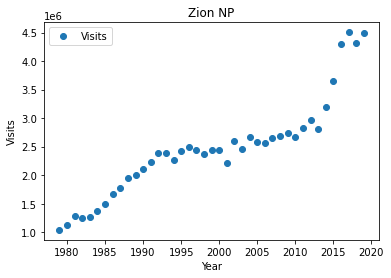

In [28]:
# park = 'Everglades NP'
park = input('Choose Park')
new_df = attendance_master_detail.loc[attendance_master_detail['Park Name'] == park]
new_df.plot(x='Year', y='Visits', style='o')  
plt.title(park)  
plt.xlabel('Year')  
plt.ylabel('Visits')  
plt.show()

In [29]:
# Determine if there are any potential outliers in the average visits of National Parks
quartiles = attendance_master_detail['Visits'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of visits is: {lowerq}")
print(f"The upper quartile of visits is: {upperq}")
print(f"The interquartile range of vistis is: {iqr}")
print(f"The the median of visits is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = attendance_master_detail.loc[(attendance_master_detail['Visits'] < lower_bound) | (attendance_master_detail['Visits'] > upper_bound)]
outlier_occupancy

The lower quartile of visits is: 365401.25
The upper quartile of visits is: 1696921.75
The interquartile range of vistis is: 1331520.5
The the median of visits is: 742175.5 
Values below -1631879.5 could be outliers.
Values above 3694202.5 could be outliers.


,Park Name,Year,Visits,parkCode,fullName,lat,lon,State,Activity Count
5,Acadia NP,1983,4124639,acad,Acadia National Park,44.409286,-68.247501,ME,46
6,Acadia NP,1984,3734763,acad,Acadia National Park,44.409286,-68.247501,ME,46
7,Acadia NP,1985,3745570,acad,Acadia National Park,44.409286,-68.247501,ME,46
8,Acadia NP,1986,3929054,acad,Acadia National Park,44.409286,-68.247501,ME,46
9,Acadia NP,1987,4288154,acad,Acadia National Park,44.409286,-68.247501,ME,46
...,...,...,...,...,...,...,...,...,...
2078,Yosemite NP,2018,4009436,yose,Yosemite National Park,37.848833,-119.557187,,33
2079,Zion NP,2019,4488268,zion,Zion National Park,37.298393,-113.026514,UT,23
2117,Zion NP,2016,4295127,zion,Zion National Park,37.298393,-113.026514,UT,23
2118,Zion NP,2017,4504812,zion,Zion National Park,37.298393,-113.026514,UT,23


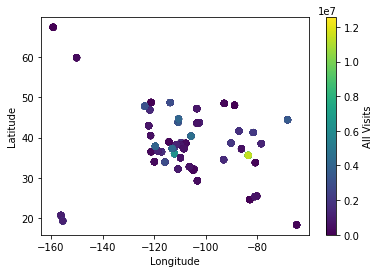

In [25]:
#latitude and longitude of the  Attendance Master Detal based off Visits 
plt.scatter(attendance_master_detail['lon'],attendance_master_detail['lat'],c=attendance_master_detail['Visits'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("All Visits")
plt.show()

## Create Heat Maps to Visualize Cost and Attendance (Kevin -  Mike support)

In [29]:
## Heat Map By Operating Costs

In [30]:
##Heat Map by Attendance

## Scater/Line Plots Operating Costs versus Attendance (Ana and Efrain)  Be creative 

## Trend Analysis (Compare Productivity Year Over Year) Mike and Kevin